In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyhyrec as pyhy

%matplotlib inline

In [2]:
# create a default cosmo params and injection params object
cosmo = pyhy.HyRecCosmoParams()
inj  = pyhy.HyRecInjectionParams()

z, xe, Tm = pyhy.call_run_hyrec(cosmo(), inj())

In [3]:
# create a cosmo params and injection params object with Primordial Black Holes
inj_pbh  = pyhy.HyRecInjectionParams({'fpbh' : 1.0, 'Mpbh': 1e+3})
z_pbh, xe_pbh, Tm_pbh = pyhy.call_run_hyrec(cosmo(), inj_pbh())

In [23]:
# create a cosmo params and injection params object with Primordial Magnetic Fields
inj_pmf_1 = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 0.01, 'nB_PMF': -2.9, 'smooth_z_PMF' : 10000.0, 'heat_channel_PMF' : 2})
z_pmf_1, xe_pmf_1, Tm_pmf_1 = pyhy.call_run_hyrec(cosmo(), inj_pmf_1())

inj_pmf_2 = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 0.01, 'nB_PMF': -2.9, 'smooth_z_PMF' : 0.0, 'heat_channel_PMF' : 1})
z_pmf_2, xe_pmf_2, Tm_pmf_2 = pyhy.call_run_hyrec(cosmo(), inj_pmf_2())

In [14]:
# load data for comparisons to the precomputed default case
data = np.loadtxt("./tests/output_xe.dat")

z_c = np.flip(data[:, 0])
xe_c = np.flip(data[:, 1])
Tm_c = np.flip(data[:, 2])

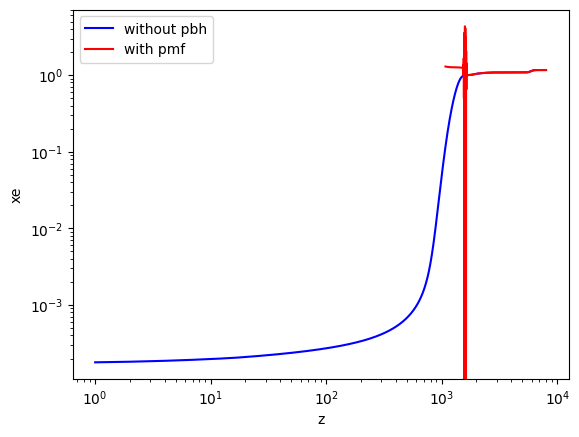

In [24]:
# plotting xe
fig = plt.figure()
ax = fig.gca()

ax.plot(z, xe, '-b', label='without pbh')
#ax.plot(z_pbh, xe_pbh, '-r', label='with pbh')
ax.plot(z_pmf_1, xe_pmf_1, '-r', label='with pmf')
#ax.plot(z_c, xe_c, 'c-.',  label='(default)')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel('xe')
ax.set_xlabel('z')
ax.legend()

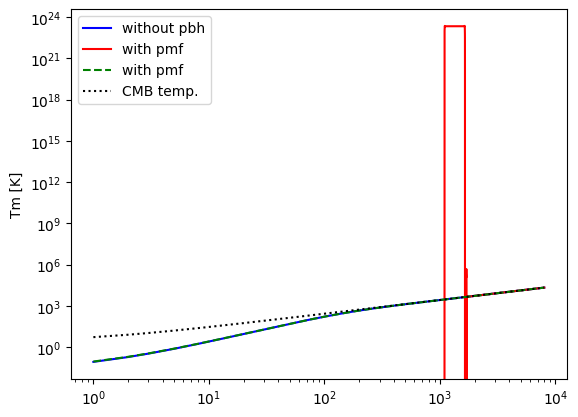

In [25]:
# plotting Tm
fig = plt.figure()
ax = fig.gca()

ax.plot(z, Tm, '-b', label='without pbh')
#ax.plot(z_pbh, Tm_pbh, '-r', label='with pbh')
ax.plot(z_pmf_1, Tm_pmf_1, '-r', label='with pmf')
ax.plot(z_pmf_2, Tm_pmf_2, '--g', label='with pmf')
#ax.plot(z_c, Tm_c, 'c-.',  label='default')

#ax.plot(z_pmf, (1.0-np.tanh((z_pmf - 1088)/50.0))/2.0)
ax.plot(z, cosmo.T0 * (1+z), color='k', linestyle=':', label='CMB temp.')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel('Tm [K]')
#ax.set_xlim(800, 1200)
#ax.set_xlabel('z')
ax.legend()

In [26]:
# create a cosmo params and injection params object with Primordial Magnetic Fields
inj_pmf = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 0.01, 'nB_PMF': -2.9, 'smooth_z_PMF' : 0.0})

pyhy.call_dEdtdV_heat_turbulences_pmf(1000, 4.405114869327771e-14, cosmo(), inj_pmf())

1.5990393327835476e-13

In [30]:
pyhy.call_dEdtdV_heat_ambipolar_pmf(1000, 0.01, 1e+3, cosmo(), inj_pmf())

43.70358305777583